In [4]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

%matplotlib inline

### Load the data set

In [5]:
athlets=pd.read_csv('athlete_events.csv')  
regions= pd.read_csv('noc_regions.csv')


### Join the data set

In [134]:
athlets_df=athlets.merge(regions, how ='left', on='NOC')
athlets_df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [7]:
athlets_df.shape


(271116, 17)

In [8]:
#making the colum uppercase
athlets_df.rename(columns={'region':'Region','notes':'Notes'} , inplace=True)

athlets_df.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


In [9]:
athlets_df.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [10]:
#cheacke nan values 
nan_values = athlets_df.isna()
nan_columns = nan_values.any()
nan_columns

ID        False
Name      False
Sex       False
Age        True
Height     True
Weight     True
Team      False
NOC       False
Games     False
Year      False
Season    False
City      False
Sport     False
Event     False
Medal      True
Region     True
Notes      True
dtype: bool

In [11]:
athlets_df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
Region       370
Notes     266077
dtype: int64

In [12]:
#Algeria detail
athlets_df.query('Team =="Algeria"').head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Region,Notes
216,105,Ilyas Abbadi,M,19.0,175.0,75.0,Algeria,ALG,2012 Summer,2012,Summer,London,Boxing,Boxing Men's Welterweight,NaN,Algeria,NaN
217,105,Ilyas Abbadi,M,23.0,175.0,75.0,Algeria,ALG,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Men's Middleweight,NaN,Algeria,NaN
432,239,Ayoub Abdellaoui,M,23.0,184.0,68.0,Algeria,ALG,2016 Summer,2016,Summer,Rio de Janeiro,Football,Football Men's Football,NaN,Algeria,NaN
444,247,El-Hachemi Abdenouz,M,24.0,170.0,63.0,Algeria,ALG,1980 Summer,1980,Summer,Moskva,Athletics,"Athletics Men's 5,000 metres",NaN,Algeria,NaN
445,248,Rda Abdenouz,M,19.0,170.0,63.0,Algeria,ALG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Men's 800 metres,NaN,Algeria,NaN


### Most perticipated country's

In [13]:
top_10_countrys = athlets_df.Team.value_counts().sort_values(ascending= False).head(10)
top_10_countrys

United States    17847
France           11988
Great Britain    11404
Italy            10260
Germany           9326
Canada            9279
Japan             8289
Sweden            8052
Australia         7513
Hungary           6547
Name: Team, dtype: int64

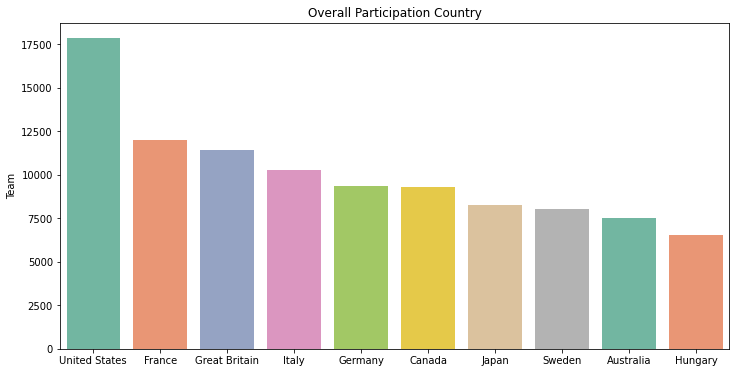

In [14]:
# Plot the top 10 countries

rcParams['figure.figsize'] = 12, 6

plt.title('Overall Participation Country')

sns.barplot(x=top_10_countrys.index, y=top_10_countrys , palette= 'Set2');

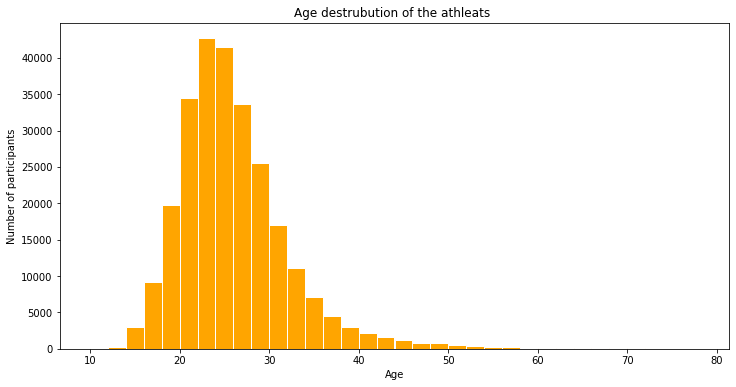

In [15]:
# Age destubution of the athlets

rcParams['figure.figsize'] = 12, 6
plt.title("Age destrubution of the athleats ")
plt.xlabel('Age')
plt.ylabel('Number of participants')

plt.hist(athlets_df.Age, bins = np.arange(10,80,2), color='orange',edgecolor='white');

In [16]:
# Winter sport olympics
winter_sport = athlets_df[athlets_df.Season== 'Winter'].Sport.unique()
winter_sport
dw= pd.DataFrame({'Winter Sports':winter_sport})
dw

,Winter Sports
0,Speed Skating
1,Cross Country Skiing
2,Ice Hockey
3,Biathlon
4,Alpine Skiing
5,Luge
6,Bobsleigh
7,Figure Skating
8,Nordic Combined
9,Freestyle Skiing


In [39]:
# Summer sports olympics
summer_sport = athlets_df[athlets_df.Season== 'Summer'].Sport.unique()

ds= pd.DataFrame({'Summer Sports':summer_sport})


### Male and Female participant


In [18]:
gender_count = athlets_df.Sex.value_counts()
gender_count

M    196594
F     74522
Name: Sex, dtype: int64

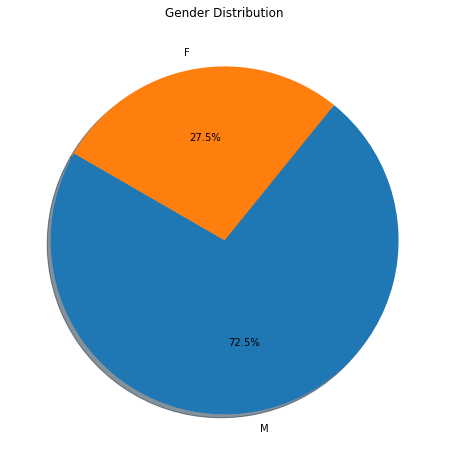

In [19]:
# Making a pie chart
rcParams['figure.figsize'] = 12, 8
plt.title('Gender Distribution')
plt.pie(gender_count, labels=gender_count.index,autopct='%1.1f%%',startangle=150,shadow=True)
plt.show()


In [20]:
# Total of medal
athlets_df.Medal.value_counts()

Gold      13372
Bronze    13295
Silver    13116
Name: Medal, dtype: int64

In [32]:
# Total number of female on each olympics
female_participant = athlets_df[(athlets_df.Sex=='F') & (athlets_df.Season=='Summer')][['Sex','Year']]
female_participant = female_participant.groupby('Year').count().reset_index()
female_participant.head()

,Year,Sex
0,1900,33
1,1904,16
2,1906,11
3,1908,47
4,1912,87


In [35]:
womens_olympics= athlets_df[(athlets_df.Sex=='F') & (athlets_df.Season=='Summer')]

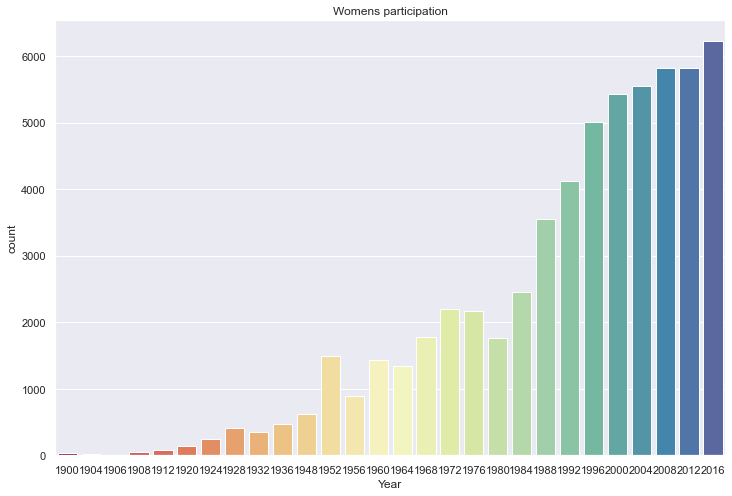

In [38]:
sns.set(style='darkgrid')
rcParams['figure.figsize'] = 12, 8
sns.countplot(x='Year',data=womens_olympics, palette='Spectral')
plt.title('Womens participation')
plt.show()

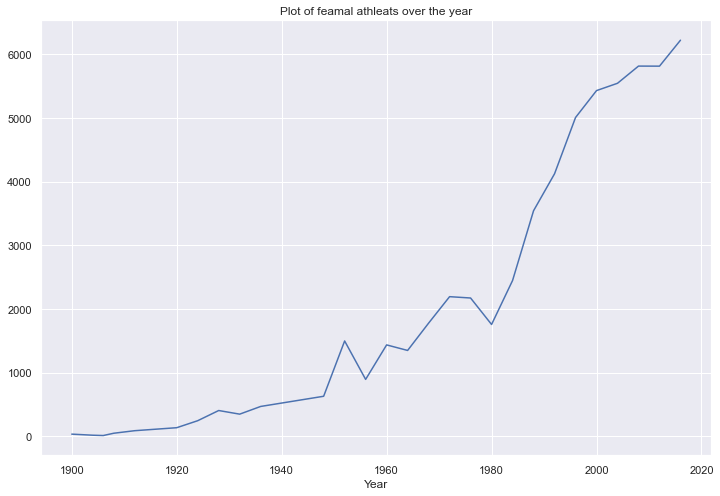

In [45]:
part = womens_olympics.groupby('Year')['Sex'].value_counts()
part.loc[:,'F'].plot()
plt.title('Plot of feamal athleats over the year')
plt.show()

In [60]:
# Gold medale athleats 
gold_medal = athlets_df[(athlets_df.Medal== 'Gold')]
len(gold_medal)

13372

In [59]:
# Take only the values who deffrient from NaN
gold_medal = gold_medal[np.isfinite(gold_medal['Age'])]
len(gold_medal)

13224

In [82]:
# how much athleats had won Gold over 60y.o 

gold_medal['ID'][gold_medal['Age'] > 60 ].count()

6

In [84]:
sporting = gold_medal['Sport'][gold_medal['Age'] > 60 ]
sporting

104003    Art Competitions
105199               Roque
190952             Archery
226374             Archery
233390            Shooting
261102             Archery
Name: Sport, dtype: object

c:\python3.8\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


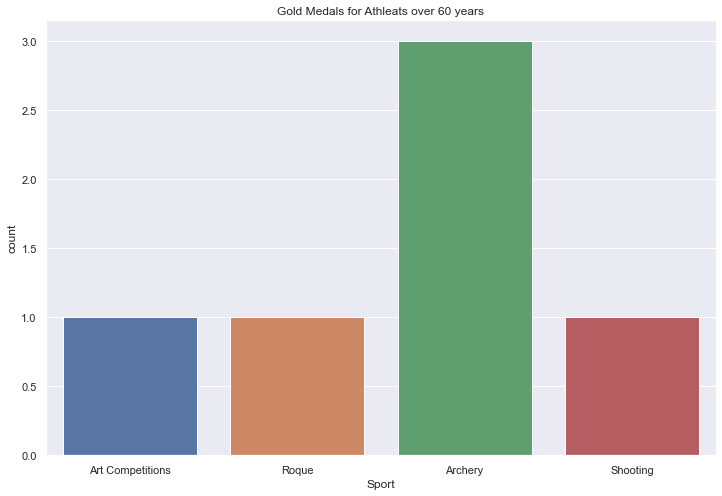

In [88]:
rcParams['figure.figsize'] = 12, 8
plt.tight_layout()
sns.countplot(sporting)
plt.title('Gold Medals for Athleats over 60 years')
plt.show()

In [90]:
# Gold Medals from each country

gold_medal.Region.value_counts().reset_index(name='Medal').head(5)

,index,Medal
0,USA,2638
1,Russia,1599
2,Germany,1301
3,UK,678
4,Italy,575


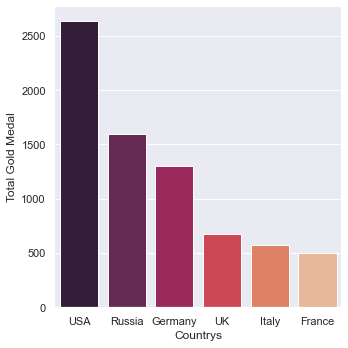

In [110]:
total_gold_medal=gold_medal.Region.value_counts().reset_index(name='Medal').head(6)
rcParams['figure.figsize'] = 12, 8
g = sns.catplot(x="index",y="Medal",data=total_gold_medal,
                 height=5 , kind ='bar',palette='rocket')
g.despine(left=True)
g.set_xlabels('Countrys')
g.set_ylabels('Total Gold Medal')
plt.show()

### 2016 olymics

In [126]:
max_olympics = athlets_df.Year.max()
team_names= athlets_df[(athlets_df.Year==max_olympics) & (athlets_df.Medal=='Gold')].Team
team_names.value_counts().head(10)

United States    137
Great Britain     64
Russia            50
Germany           47
China             44
Brazil            34
Australia         23
Argentina         21
France            20
Japan             17
Name: Team, dtype: int64

### Making a plot 


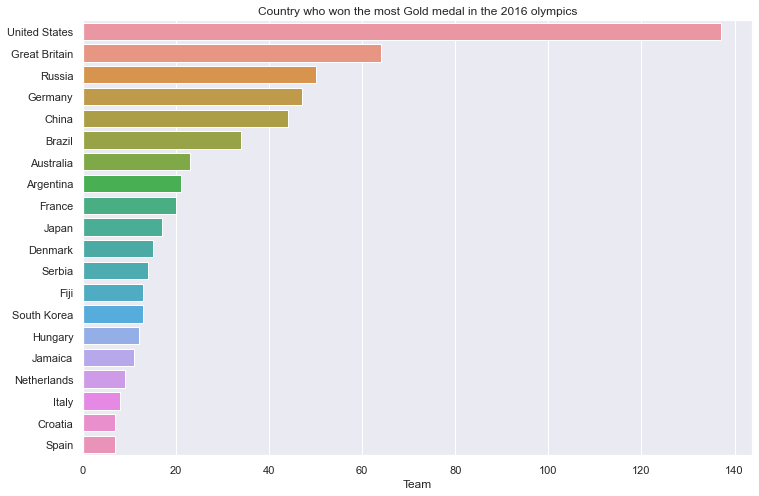

In [130]:
sns.barplot(x=team_names.value_counts().head(20),y= team_names.value_counts().head(20).index)
plt.title('Country who won the most Gold medal in the 2016 olympics')
plt.show()

In [141]:
#not_medal=athlets_df[(athlets_df['Medal'].notnull())]
#not_medal

In [142]:
not_nan_medal=athlets_df[(athlets_df['Height'].notnull()) & (athlets_df['Weight'].notnull())]
not_nan_medal.head(1)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN


Text(0.5, 1.0, 'Height vs Weight of olympics Medalist')

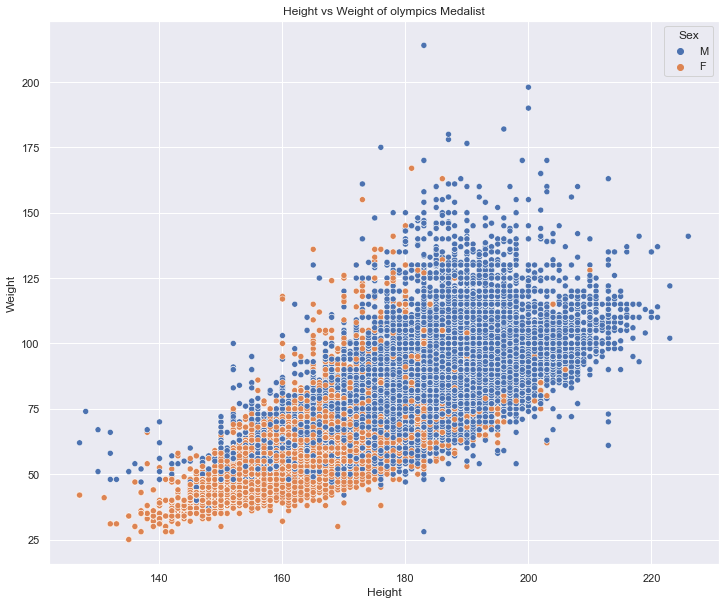

In [143]:
rcParams['figure.figsize'] = 12, 10
axis= sns.scatterplot(x='Height',y='Weight',data=not_nan_medal, hue='Sex')
plt.title('Height vs Weight of olympics Medalist')


In [144]:
not_medal=athlets_df[(athlets_df['Medal'].notnull())]
not_medal

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
